<a href="https://colab.research.google.com/github/bhawsh/line-detection-car/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas_datareader as pdr

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf

# ✅ Load Apple stock data (AAPL) from 2010 to today
df = yf.download('AAPL', start='2010-01-01', end='2024-12-31')

print("✅ Rows fetched:", len(df))
df.head()


/tmp/ipython-input-3-2116984408.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('AAPL', start='2010-01-01', end='2024-12-31')
[*********************100%***********************]  1 of 1 completed

✅ Rows fetched: 3773


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.431896,6.446622,6.382907,6.414464,493729600
2010-01-05,6.443017,6.479382,6.409055,6.449629,601904800
2010-01-06,6.340530,6.468561,6.333918,6.443015,552160000
2010-01-07,6.328810,6.371488,6.282827,6.363974,477131200
2010-01-08,6.370887,6.371489,6.283130,6.320396,447610800


In [4]:
df.to_csv('AAPL.csv')

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('AAPL.csv')
df.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']
df = df.iloc[2:].copy()
df['Close'] = pd.to_numeric(df['Close'])

In [7]:
df.head()

,Date,Close,High,Low,Open,Volume
2,2010-01-04,6.431896,6.446622218528988,6.382907496530451,6.4144643088171485,493729600
3,2010-01-05,6.443017,6.4793821235584055,6.409054923226288,6.449628601266614,601904800
4,2010-01-06,6.340530,6.468560832823781,6.333917848467796,6.443014599215653,552160000
5,2010-01-07,6.328810,6.371487735528592,6.282827460801755,6.363974016902019,477131200
6,2010-01-08,6.370887,6.371488778365754,6.2831298404554214,6.320396285875987,447610800


In [8]:
df.tail()

,Date,Close,High,Low,Open,Volume
3770,2024-12-23,254.655716,255.03479114956258,252.8400883307868,254.15691915529422,40858800
3771,2024-12-24,257.578674,257.58862955018265,254.67565812568793,254.87518901917565,23234700
3772,2024-12-26,258.396667,259.47408555117545,257.0100282923795,257.56867823862046,27237100
3773,2024-12-27,254.974930,258.0774615569102,252.4510193654514,257.20952960207876,42355300
3774,2024-12-30,251.593079,252.88995321263158,250.14657107718884,251.62300520062965,35557500


In [9]:
df1 = df['Close']

In [10]:
df1.shape

(3773,)

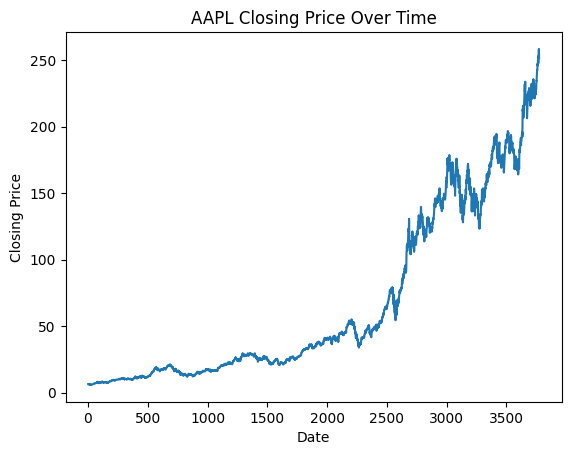

In [11]:
import matplotlib.pyplot as plt
plt.plot(df1)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AAPL Closing Price Over Time')
plt.show()

In [12]:
import numpy as np

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
print(df1)

[[0.00261253]
 [0.00265655]
 [0.00225086]
 ...
 [1.        ]
 [0.98645526]
 [0.9730684 ]]


In [15]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,test_size

(2452, 1321)

In [17]:
import numpy
def create_dataset(dataset,time_step=1):
  dataX,dataY=[],[]
  for i in range(len(dataset)-time_step-1):
    a=dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i+time_step,0])
  return numpy.array(dataX),numpy.array(dataY)

In [18]:
timestep=100
X_train,y_train=create_dataset(train_data,timestep)
X_test,y_test=create_dataset(test_data,timestep)

In [19]:
print(X_train.shape),print(y_train.shape)

(2351, 100)
(2351,)


(None, None)

In [20]:
print(X_test.shape),print(y_test.shape)

(1220, 100)
(1220,)


(None, None)

In [21]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 13s 220ms/step - loss: 0.0025 - val_loss: 0.0050
Epoch 2/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 213ms/step - loss: 4.7833e-05 - val_loss: 0.0012
Epoch 3/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 175ms/step - loss: 3.2811e-05 - val_loss: 0.0012
Epoch 4/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 212ms/step - loss: 3.1486e-05 - val_loss: 0.0017
Epoch 5/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 7s 180ms/step - loss: 3.1632e-05 - val_loss: 0.0025
Epoch 6/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 175ms/step - loss: 2.8355e-05 - val_loss: 0.0030
Epoch 7/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 176ms/step - loss: 2.7565e-05 - val_loss: 0.0020
Epoch 8/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 8s 210ms/step - loss: 2.7899e-05 - val_loss: 0.0022
Epoch 9/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 11s 221ms/step - loss: 2.7078e-05 - val_loss: 0.0033
Epoch 10/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 9s 176ms/step - loss: 2.5013e-05 - val_loss: 0.0026
Epoch 11/100
37/37 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - loss: 2.2605e-05 - val_loss: 0.0

In [27]:
import tensorflow as tf

In [28]:
tf.__version__

'2.18.0'

In [29]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

74/74 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


In [30]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [31]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

28.025134972820208

In [32]:
math.sqrt(mean_squared_error(y_test,test_predict))


158.33295406760834

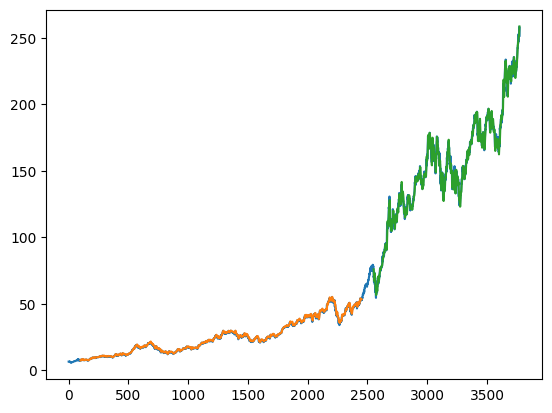

In [33]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [34]:
len(test_data)

1321

In [36]:
x_input=test_data[1221:].reshape(1,-1)
x_input.shape

(1, 100)

In [45]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [44]:
temp_input

[0.8175966405626303,
 0.8291409031455884,
 0.8352155528627572,
 0.8499682563470229,
 0.8517433210358841,
 0.863577025227289,
 0.8688233355833903,
 0.8681922054985287,
 0.8706377817264893,
 0.8702039213188365,
 0.8628275695767039,
 0.8719394837514535,
 0.8732806880326622,
 0.8766335477331756,
 0.8705588980160069,
 0.8835759786666525,
 0.8804598304985893,
 0.8558850782422236,
 0.8483115776248885,
 0.8543467250858126,
 0.8481931916581616,
 0.8485482287563353,
 0.8453925179310241,
 0.8554512178345711,
 0.8558850782422236,
 0.8548200877497095,
 0.8304426655715562,
 0.8322965535698963,
 0.8476803871390235,
 0.8799469655784476,
 0.8773041196732784,
 0.8704800747065281,
 0.8740301436832472,
 0.8700855353521099,
 0.8746218319128676,
 0.8756868828063848,
 0.8962381430211315,
 0.8694544656682519,
 0.8717028326200066,
 0.8673243034802135,
 0.8717817767314924,
 0.8516249954701607,
 0.8677188428346317,
 0.8825898718846208,
 0.880617597919554,
 0.8747401574785909,
 0.8895323632191012,
 0.899591002721

In [48]:
from numpy import array
lst_output = []
n_steps = 100
i=0
while(i<30):
   if(len(temp_input)>100):
     x_input=np.array(temp_input[1:])
     print("{} day input {}".format(i,x_input))
     x_input=x_input.reshape(1,-1)
     x_input=x_input.reshape((1,n_steps,1))
     yhat=model.predict(x_input,verbose=0)
     print("{} day output {}".format(i,yhat))
     temp_input.extend(yhat[0].tolist())
     temp_input=temp_input[1:]
     lst_output.extend(yhat.tolist())
     i=i+1
   else:
     x_input=x_input.reshape((1,n_steps,1))
     yhat=model.predict(x_input,verbose=0)
     print(yhat[0])
     temp_input.extend(yhat[0].tolist())
     print(len(temp_input))
     lst_output.extend(yhat.tolist())
     i=i+1
print(lst_output)

[0.9953992]
101
1 day input [0.8291409  0.83521555 0.84996826 0.85174332 0.86357703 0.86882334
 0.86819221 0.87063778 0.87020392 0.86282757 0.87193948 0.87328069
 0.87663355 0.8705589  0.88357598 0.88045983 0.85588508 0.84831158
 0.85434673 0.84819319 0.84854823 0.84539252 0.85545122 0.85588508
 0.85482009 0.83044267 0.83229655 0.84768039 0.87994697 0.87730412
 0.87048007 0.87403014 0.87008554 0.87462183 0.87568688 0.89623814
 0.86945447 0.87170283 0.8673243  0.87178178 0.851625   0.86771884
 0.88258987 0.8806176  0.87474016 0.88953236 0.899591   0.89142569
 0.89288522 0.90412724 0.90996524 0.9075196  0.88740226 0.88665281
 0.88996622 0.89781594 0.89888099 0.88479886 0.86827109 0.85643732
 0.8528872  0.85856743 0.85568787 0.874464   0.87339787 0.86261731
 0.86261731 0.86613181 0.87837346 0.86565796 0.87758366 0.87861041
 0.88145361 0.87955816 0.88488916 0.89673591 0.905384   0.90487065
 0.91434806 0.92327261 0.93535631 0.93677791 0.93689635 0.93610655
 0.95154686 0.95557476 0.95052016 

In [49]:
day_new=np.arange(1,101)
day_predict=np.arange(101,131)

In [50]:
import matplotlib.pyplot as plt

In [51]:
len(df1)

3773

In [52]:
df3=df1.tolist()
df3.extend(lst_output)

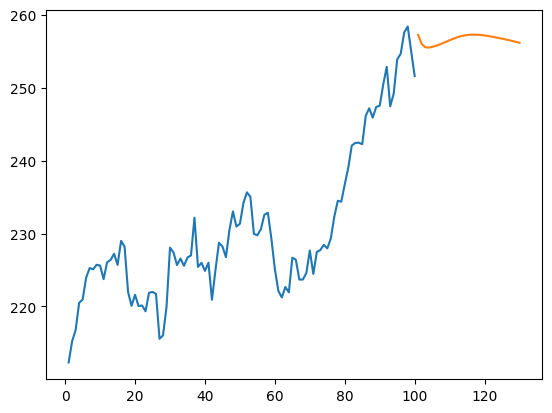

In [56]:
plt.plot(day_new,scaler.inverse_transform(df1[3673:]))
plt.plot(day_predict,scaler.inverse_transform(lst_output))

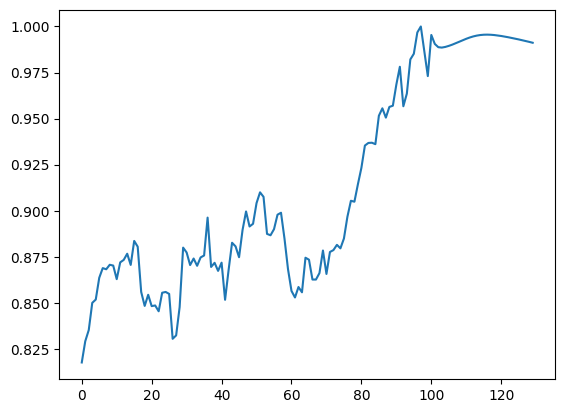

In [57]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[3673:])